In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("~/Loan_Default.csv")
df.head(10)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
5,24895,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,EXP,864,EXP,35-44,not_inst,70.089286,North,direct,0,40.0
6,24896,2019,cf,Joint,pre,type1,p3,l1,nopc,nob/c,...,EXP,860,EXP,55-64,to_inst,79.109589,North,direct,0,44.0
7,24897,2019,NaN,Female,nopre,type1,p4,l1,nopc,nob/c,...,CIB,863,CIB,55-64,to_inst,86.525974,North,direct,0,42.0
8,24898,2019,cf,Joint,nopre,type1,p3,l1,nopc,nob/c,...,CIB,580,EXP,55-64,to_inst,78.765690,central,direct,0,44.0
9,24899,2019,cf,Sex Not Available,nopre,type3,p3,l1,nopc,nob/c,...,CIB,788,EXP,55-64,to_inst,63.444767,south,direct,0,30.0


In [3]:
df.drop(['ID','year','loan_limit','approv_in_adv','Security_Type',],axis='columns',inplace=True)
df.head(4)

,Gender,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Status,dtir1
0,Sex Not Available,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,...,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,1,45.0
1,Male,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,...,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,1,NaN
2,Male,type1,p1,l1,nopc,nob/c,406500,4.56,0.200,595.0,...,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,0,46.0
3,Male,type1,p4,l1,nopc,nob/c,456500,4.25,0.681,NaN,...,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,0,42.0


In [4]:
for col in df.select_dtypes("object").columns:
    df[col] = df[col].replace({val: i for i, val in enumerate(df[col].unique())}).value_counts()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Gender                     4 non-null       float64
 1   loan_type                  3 non-null       float64
 2   loan_purpose               5 non-null       float64
 3   Credit_Worthiness          2 non-null       float64
 4   open_credit                2 non-null       float64
 5   business_or_commercial     2 non-null       float64
 6   loan_amount                148670 non-null  int64  
 7   rate_of_interest           112231 non-null  float64
 8   Interest_rate_spread       112031 non-null  float64
 9   Upfront_charges            109028 non-null  float64
 10  term                       148629 non-null  float64
 11  Neg_ammortization          3 non-null       float64
 12  interest_only              2 non-null       float64
 13  lump_sum_payment           2 

In [6]:
nan_vals = df.isna().sum()/df.shape[0]
nan_vals

Gender                       0.999973
loan_type                    0.999980
loan_purpose                 0.999966
Credit_Worthiness            0.999987
open_credit                  0.999987
business_or_commercial       0.999987
loan_amount                  0.000000
rate_of_interest             0.245100
Interest_rate_spread         0.246445
Upfront_charges              0.266644
term                         0.000276
Neg_ammortization            0.999980
interest_only                0.999987
lump_sum_payment             0.999987
property_value               0.101554
construction_type            0.999987
occupancy_type               0.999980
Secured_by                   0.999987
total_units                  0.999973
income                       0.061546
credit_type                  0.999973
Credit_Score                 0.000000
co-applicant_credit_type     0.999987
age                          0.999946
submission_of_application    0.999980
LTV                          0.101554
Region      

In [7]:
nan_vals[nan_vals > 0.8].index

Index(['Gender', 'loan_type', 'loan_purpose', 'Credit_Worthiness',
       'open_credit', 'business_or_commercial', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'construction_type',
       'occupancy_type', 'Secured_by', 'total_units', 'credit_type',
       'co-applicant_credit_type', 'age', 'submission_of_application',
       'Region'],
      dtype='object')

In [8]:
drop_cols = list(nan_vals[nan_vals > 0.8].index)
df = df.drop(drop_cols, axis = 1)

In [9]:
X = df.drop("Status", axis = 1)
y = df["Status"]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
 


In [11]:
X_train

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1
104725,276500,NaN,NaN,NaN,360.0,NaN,7020.0,839,NaN,NaN
22719,646500,5.250,1.3976,12360.00,360.0,928000.0,14640.0,544,69.665948,29.0
119349,276500,3.875,0.5677,6950.00,180.0,418000.0,12780.0,812,66.148325,30.0
95438,216500,4.625,0.3412,3430.00,360.0,278000.0,3480.0,757,77.877698,49.0
47958,506500,3.875,-0.1714,3125.00,360.0,638000.0,8220.0,664,79.388715,30.0
...,...,...,...,...,...,...,...,...,...,...
30714,456500,4.500,0.8182,2998.68,360.0,478000.0,8280.0,847,95.502092,36.0
116661,386500,4.990,1.3181,0.00,360.0,408000.0,11220.0,696,94.730392,38.0
31555,96500,NaN,NaN,NaN,240.0,118000.0,1800.0,739,81.779661,48.0
129245,396500,2.990,0.0950,12100.81,144.0,588000.0,10980.0,743,67.431973,43.0


In [12]:
X_train.isna().sum()

loan_amount                 0
rate_of_interest        29156
Interest_rate_spread    29311
Upfront_charges         31709
term                       24
property_value          12082
income                   7338
Credit_Score                0
LTV                     12082
dtir1                   19315
dtype: int64

In [13]:
X_test.isna().sum()

loan_amount                0
rate_of_interest        7283
Interest_rate_spread    7328
Upfront_charges         7933
term                      17
property_value          3016
income                  1812
Credit_Score               0
LTV                     3016
dtir1                   4806
dtype: int64

In [14]:
for col in X_train.columns:
    val = X_train[col].mode()[0]
    X_train[col] = X_train[col].fillna(val)
    X_test[col] = X_test[col].fillna(val)

/home/miki/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/miki/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

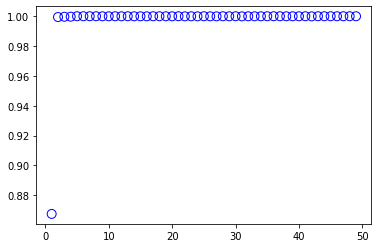

In [16]:
%matplotlib inline
fig = plt.figure()

for n in range(1,50):
    decision_tree_classifier = DecisionTreeClassifier(max_depth=n)
    decision_tree_classifier.fit(X_train, y_train)
    y=decision_tree_classifier.score(X_test,y_test)
    plt.scatter(n, y, s=80, facecolors='none', edgecolors='b')

plt.show(block = True)

In [17]:
# Osztályozó létrehozása
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

# Tanítás a tanító adatkészlettel
decision_tree_classifier.fit(X_train, y_train)
decision_tree_classifier.score(X_test,y_test)

0.8674917602744333

Model accuracy score with criterion entropy: 0.8675


[Text(334.8, 326.15999999999997, 'X[2] <= -0.028\ngini = 0.371\nsamples = 118936\nvalue = [89625, 29311]'),
 Text(167.4, 108.72000000000003, 'gini = 0.454\nsamples = 45031\nvalue = [15720, 29311]'),
 Text(502.20000000000005, 108.72000000000003, 'gini = 0.0\nsamples = 73905\nvalue = [73905, 0]')]

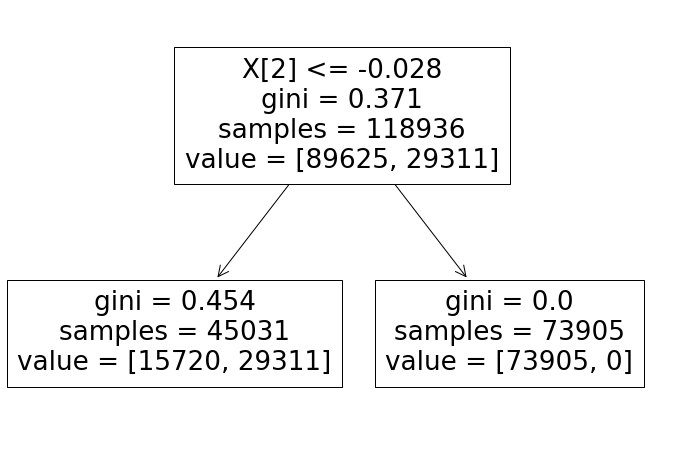

In [18]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, decision_tree_classifier.predict(X_test))))
y_pred_train_en = decision_tree_classifier.predict(X_train)
y_pred_train_en
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(decision_tree_classifier.fit(X_train, y_train))

In [19]:
y_test[:10]

37656     1
45483     0
107311    0
38451     0
125049    0
79353     0
52570     0
91165     0
128185    0
91290     0
Name: Status, dtype: int64

In [20]:
decision_tree_classifier.predict(X_test[:10])

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])